# CNN

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
# Model / data parameters
num_classes = 10
#              w    h   c
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

print(y_train)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[1:5])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
[5 0 4 ... 5 6 8]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

# Training the model

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", 
                                                                          keras.metrics.Precision(), 
                                                                          keras.metrics.Recall()])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 48s 111ms/step - loss: 0.7357 - accuracy: 0.7731 - precision: 0.8911 - recall: 0.6495 - val_loss: 0.0812 - val_accuracy: 0.9783 - val_precision: 0.9825 - val_recall: 0.9733
Epoch 2/15
422/422 [==============================] - 44s 104ms/step - loss: 0.1210 - accuracy: 0.9626 - precision: 0.9696 - recall: 0.9574 - val_loss: 0.0552 - val_accuracy: 0.9853 - val_precision: 0.9883 - val_recall: 0.9825
Epoch 3/15
422/422 [==============================] - 44s 105ms/step - loss: 0.0876 - accuracy: 0.9725 - precision: 0.9765 - recall: 0.9691 - val_loss: 0.0460 - val_accuracy: 0.9883 - val_precision: 0.9905 - val_recall: 0.98620.0877 - accuracy: 0.9724 - precision: 0.9765 - recall: 0.96 - ETA: 6s -
Epoch 4/15
422/422 [==============================] - 45s 106ms/step - loss: 0.0720 - accuracy: 0.9774 - precision: 0.9805 - recall: 0.9745 - val_loss: 0.0449 - val_accuracy: 0.9882 - val_precision: 0.9905 - val_recall: 0.9868
Epoch 5/15
422/422 [

# Visualizing the model metrics

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


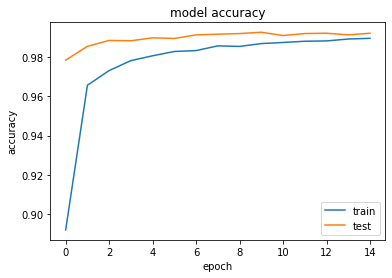

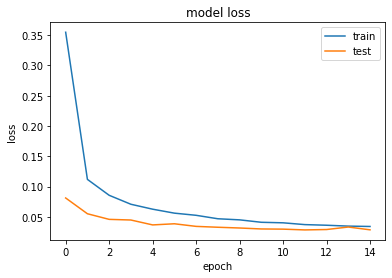

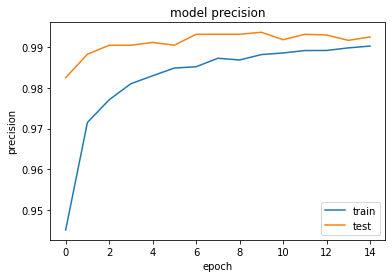

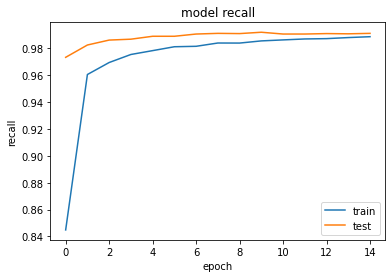

C:\Users\lenovo\anaconda3\envs\Assign\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [5]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


#Evaluating Model
score  = model.predict_classes(x_test)
 

# Test Accuracy on the model

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024336516857147217
Test accuracy: 0.9927999973297119


# SVM

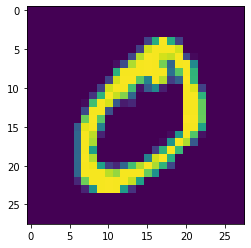

In [24]:
import matplotlib.pyplot as plt


plt.imshow(x_train[1])

## Flattening the data 

In [8]:

def flat(data):
    data_ = []

    for i in range(len(data)):
        data_.append(data[i].flatten())
        
    return data_


### calling the functions

In [9]:
x_test_ = flat(x_test)
x_train_ = flat(x_train)

In [27]:
# y = np.array([0, 0, 0, 0, 0, 0, 1])
# np.argmax(y)

# Creating the classes from categorical data

In [10]:
def test_max(data):
    
    test_c = []
        
    for i in range(len(data)):
        
        test_c.append(np.argmax(data[i]))
        
    return test_c

    

In [11]:
y_test_ = test_max(y_test)
y_train_ = test_max(y_train)

# Splitting the data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train_, y_train_, test_size=0.2, random_state=13)

# SVC (support vector classifier)

In [13]:
from sklearn.svm import SVC

svc = SVC().fit(x_train_, y_train_)

In [14]:
y_pred_ = svc.predict(x_test_)

In [15]:
y_train_pred = svc.predict(x_train_)

# Calculating the metrics

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Test Accuracy score of the data {accuracy_score(y_pred_, y_test_)}")
print(f"Train Accuracy score of the data {accuracy_score(y_train_pred, y_train_)}")

Test Accuracy score of the data 0.9792
Train Accuracy score of the data 0.9899166666666667


# Classification report 

In [17]:
print("********* TRAIN CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(y_train_pred, y_train_))

print(" ")

print("********* TEST CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(y_pred_, y_test_))

********* TRAIN CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5937
           1       0.99      0.99      0.99      6767
           2       0.99      0.99      0.99      5982
           3       0.98      0.99      0.99      6080
           4       0.99      0.99      0.99      5868
           5       0.99      0.99      0.99      5407
           6       1.00      0.99      1.00      5926
           7       0.99      0.99      0.99      6260
           8       0.99      0.99      0.99      5841
           9       0.98      0.98      0.98      5932

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

 
********* TEST CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       993
           1       0.99    